In [1]:
import pandas as pd

# from sklearn.linear_model import Ridge
from reservoirpy.nodes import Reservoir, Ridge, ESN
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the separated input data from CSV files
input_genres_tags_data = pd.read_csv("../data/train/input_genres_tags_data.csv")
input_instruments_tags_data = pd.read_csv(
    "../data/train/input_instruments_tags_data.csv"
)
input_moods_tags_data = pd.read_csv("../data/train/input_moods_tags_data.csv")

genres_categories_data = pd.read_csv("../data/train/genres_categories_data.csv")
instruments_categories_data = pd.read_csv(
    "../data/train/instruments_categories_data.csv"
)
moods_categories_data = pd.read_csv("../data/train/moods_categories_data.csv")

# Load the separated output data from CSV files
output_genres_tags_data = pd.read_csv("../data/train/output_genres_tags_data.csv")
output_instruments_tags_data = pd.read_csv(
    "../data/train/output_instruments_tags_data.csv"
)
output_moods_tags_data = pd.read_csv("../data/train/output_moods_tags_data.csv")

In [3]:
# Print the first few rows of each class to verify
print("Input Genres Tags Data:")
print(input_genres_tags_data.head())

print("\nInput Instruments Tags Data:")
print(input_instruments_tags_data.head())

print("\nInput Moods Tags Data:")
print(input_moods_tags_data.head())

print("\nGenres Categories Data:")
print(genres_categories_data.head())

print("\nInstruments Categories Data:")
print(instruments_categories_data.head())

print("\nMoods Categories Data:")
print(moods_categories_data.head())

print("\nOutput Genres Tags Data:")
print(output_genres_tags_data.head())

print("\nOutput Instruments Tags Data:")
print(output_instruments_tags_data.head())

print("\nOutput Moods Tags Data:")
print(output_moods_tags_data.head())

Input Genres Tags Data:
   ChallengeID  acid-jazz  alternative-rock  americana  blaxpoitation  \
0            0   0.000023          0.006455   0.001339       0.000159   
1            1   0.000069          0.056431   0.008977       0.000347   
2            2   0.000039          0.017784   0.001067       0.000290   
3            3   0.000047          0.004563   0.000289       0.000520   
4            4   0.000022          0.006412   0.001309       0.000204   

   bluegrass  blues-rock  bossa-nova  breakbeat  chill-out  ...    techno  \
0   0.000045    0.000191    0.000087   0.014584   0.007135  ...  0.013838   
1   0.000536    0.001447    0.000093   0.047316   0.019435  ...  0.003960   
2   0.000021    0.001512    0.000033   0.109496   0.008511  ...  0.031038   
3   0.000013    0.000264    0.000026   0.265472   0.004216  ...  0.085144   
4   0.000025    0.001302    0.000039   0.008771   0.001732  ...  0.016197   

   traditional-folk    trance      trap  trip-hop  uptown-soul  vintage-ja

In [3]:
# Split the data into training and testing sets

# Split genres tags data
X_genres_train, X_genres_test, y_genres_train, y_genres_test = train_test_split(
    input_genres_tags_data, output_genres_tags_data, test_size=0.2, random_state=42
)

# Split instruments tags data
X_instruments_train, X_instruments_test, y_instruments_train, y_instruments_test = (
    train_test_split(
        input_instruments_tags_data,
        output_instruments_tags_data,
        test_size=0.2,
        random_state=42,
    )
)

# Split moods tags data
X_moods_train, X_moods_test, y_moods_train, y_moods_test = train_test_split(
    input_moods_tags_data, output_moods_tags_data, test_size=0.2, random_state=42
)

# Optionally, you can print the shapes to verify
print(f"Genres training data shape: {X_genres_train.shape}, {y_genres_train.shape}")
print(f"Genres testing data shape: {X_genres_test.shape}, {y_genres_test.shape}")

print(
    f"Instruments training data shape: {X_instruments_train.shape}, {y_instruments_train.shape}"
)
print(
    f"Instruments testing data shape: {X_instruments_test.shape}, {y_instruments_test.shape}"
)

print(f"Moods training data shape: {X_moods_train.shape}, {y_moods_train.shape}")
print(f"Moods testing data shape: {X_moods_test.shape}, {y_moods_test.shape}")


Genres training data shape: (88683, 91), (88683, 91)
Genres testing data shape: (22171, 91), (22171, 91)
Instruments training data shape: (88683, 113), (88683, 113)
Instruments testing data shape: (22171, 113), (22171, 113)
Moods training data shape: (88683, 47), (88683, 47)
Moods testing data shape: (22171, 47), (22171, 47)


In [4]:
# Prepare the data for training
X_genres_train = X_genres_train.drop(columns=["ChallengeID"])
X_instruments_train = X_instruments_train.drop(columns=["ChallengeID"])
X_moods_train = X_moods_train.drop(columns=["ChallengeID"])
y_genres_train = y_genres_train.drop(columns=["ChallengeID"])
y_instruments_train = y_instruments_train.drop(columns=["ChallengeID"])
y_moods_train = y_moods_train.drop(columns=["ChallengeID"])

X_genres_test = X_genres_test.drop(columns=["ChallengeID"])
X_instruments_test = X_instruments_test.drop(columns=["ChallengeID"])
X_moods_test = X_moods_test.drop(columns=["ChallengeID"])
y_genres_test = y_genres_test.drop(columns=["ChallengeID"])
y_instruments_test = y_instruments_test.drop(columns=["ChallengeID"])
y_moods_test = y_moods_test.drop(columns=["ChallengeID"])

In [40]:
# Define the reservoir and readout models
reservoir_Genre = Reservoir(
    units=50,  # Number of neurons
    sr=0,  # Spectral radius of the weight matrix
    lr=1,  # Leak rate
    input_scaling=1.0,  # Input scaling factor
)

readout_Genre = Ridge(ridge=1e-4)  # Regularization: penalizes overfitting
# model_Genre = reservoir_Genre >> readout_Genre
model_Genre = ESN(reservoir=reservoir_Genre, readout=readout_Genre, workers=-1)

reservoir_Instrument = Reservoir(
    units=50,  # Number of neurons
    sr=0,  # Spectral radius of the weight matrix
    lr=1,  # Leak rate
)
readout_Instrument = Ridge(ridge=1e-4)  # Regularization: penalizes overfitting
# model_Instrument = reservoir_Instrument >> readout_Instrument
model_Instrument = ESN(reservoir=reservoir_Instrument, readout=readout_Instrument, workers=-1)

reservoir_Mood = Reservoir(
    units=50,  # Number of neurons
    sr=0,  # Spectral radius of the weight matrix
    lr=1,  # Leak rate
)
readout_Mood = Ridge(ridge=1e-4)  # Regularization: penalizes overfitting
# model_Mood = reservoir_Mood >> readout_Mood
model_Mood = ESN(reservoir=reservoir_Mood, readout=readout_Mood, workers=-1)

In [41]:
# Ensure the input data is in the correct format
X_genres_train_reshaped = X_genres_train.values.reshape(
    -1, 1, X_genres_train.shape[1]
)
X_instruments_train_reshaped = X_instruments_train.values.reshape(
    -1, 1, X_instruments_train.shape[1]
)
X_moods_train_reshaped = X_moods_train.values.reshape(-1, 1, X_moods_train.shape[1])

y_genres_train_reshaped = y_genres_train.values.reshape(-1, 1, y_genres_train.shape[1])
y_instruments_train_reshaped = y_instruments_train.values.reshape(
    -1, 1, y_instruments_train.shape[1]
)
y_moods_train_reshaped = y_moods_train.values.reshape(-1, 1, y_moods_train.shape[1])

# Shape of the input data
print(f"Genres training data shape: {X_genres_train.shape}, {y_genres_train.shape}")
print(
    f"Instruments training data shape: {X_instruments_train.shape}, {y_instruments_train.shape}"
)
print(f"Moods training data shape: {X_moods_train.shape}, {y_moods_train.shape}")
# Shape of the reshape data
print(
    f"Genres training data reshape: {X_genres_train_reshaped.shape}, {y_genres_train_reshaped.shape}"
)
print(
    f"Instruments training data reshape: {X_instruments_train_reshaped.shape}, {y_instruments_train_reshaped.shape}"
)
print(
    f"Moods training data reshape: {X_moods_train_reshaped.shape}, {y_moods_train_reshaped.shape}"
)


Genres training data shape: (88683, 90), (88683, 90)
Instruments training data shape: (88683, 112), (88683, 112)
Moods training data shape: (88683, 46), (88683, 46)
Genres training data reshape: (88683, 1, 90), (88683, 1, 90)
Instruments training data reshape: (88683, 1, 112), (88683, 1, 112)
Moods training data reshape: (88683, 1, 46), (88683, 1, 46)


In [57]:
# Train the models with one line for single timestep
model_Genre.fit(X_genres_train_reshaped, y_genres_train_reshaped)
model_Instrument.fit(X_instruments_train_reshaped, y_instruments_train_reshaped)
model_Mood.fit(X_moods_train_reshaped, y_moods_train_reshaped)

print("Models trained successfully.")

Running ESN-2: 100%|██████████| 88683/88683 [00:07<00:00, 11685.72it/s]


Fitting node ESN-2...


Running ESN-3: 100%|██████████| 88683/88683 [00:07<00:00, 11542.44it/s]


Fitting node ESN-3...


Running ESN-4: 100%|██████████| 88683/88683 [00:07<00:00, 12013.80it/s]


Fitting node ESN-4...
Models trained successfully.


In [58]:
# Test the models
X_genres_test_reshaped = X_genres_test.values.reshape(
    -1, 1, X_genres_test.shape[1]
)

X_instruments_test_reshaped = X_instruments_test.values.reshape(
    -1, 1, X_instruments_test.shape[1]
)

X_moods_test_reshaped = X_moods_test.values.reshape(-1, 1, X_moods_test.shape[1])

print(f"Genres testing data shape: {X_genres_test_reshaped.shape}")
print(f"Instruments testing data shape: {X_instruments_test_reshaped.shape}")
print(f"Moods testing data shape: {X_moods_test_reshaped.shape}")


Genres testing data shape: (22171, 1, 90)
Instruments testing data shape: (22171, 1, 112)
Moods testing data shape: (22171, 1, 46)


In [59]:
y_genres_pred = model_Genre.run(X_genres_test_reshaped)
y_instruments_pred = model_Instrument.run(X_instruments_test_reshaped)
y_moods_pred = model_Mood.run(X_moods_test_reshaped)

Running ESN-4: 100%|██████████| 22171/22171 [00:00<00:00, 48583.77it/s]


In [60]:
def save_predictions_to_csv(predictions_list, filename=None):
    # Convert the list to a NumPy array
    predictions_array = np.array(predictions_list)

    # Reshape the array to 2-dimensional
    predictions_reshaped = predictions_array.reshape(-1, predictions_array.shape[-1])

    # Convert the reshaped array to a DataFrame
    predictions_df = pd.DataFrame(predictions_reshaped)

    # Save the DataFrame to a CSV file with the name of the predictions_list variable
    csv_filename = f"../data/predictions/{filename}.csv" if filename else f"../data/predictions/{predictions_list}.csv"
    predictions_df.to_csv(csv_filename, index=False)

    # Display the DataFrame
    print(predictions_df)

    return predictions_df


# Example usage
y_genres_pred_df = save_predictions_to_csv(y_genres_pred, "y_genres_pred")
y_instruments_pred_df = save_predictions_to_csv(y_instruments_pred, "y_instruments_pred")
y_moods_pred_df = save_predictions_to_csv(y_moods_pred, "y_moods_pred")


             0         1         2         3         4         5         6   \
0     -0.004404  0.003999  0.004395  0.005824  0.005785 -0.023312  0.003448   
1      0.011697  0.059978  0.026215  0.000934 -0.003290  0.001797 -0.003633   
2     -0.012983 -0.011308  0.003535 -0.002544 -0.002441  0.016693 -0.009362   
3     -0.000193  0.048292  0.001479  0.002950 -0.010996  0.001821 -0.003803   
4      0.007229  0.047991  0.017852  0.004761 -0.007383  0.017197  0.021736   
...         ...       ...       ...       ...       ...       ...       ...   
22166 -0.008897  0.430291 -0.018894  0.001644 -0.003680 -0.011742 -0.029811   
22167 -0.003640  0.470003  0.007872 -0.000765  0.002770  0.002031 -0.003325   
22168  0.006468  0.008478  0.027593  0.001406 -0.004671  0.000384  0.012900   
22169  0.006895  0.007300  0.011697 -0.003039  0.006861 -0.014294 -0.000069   
22170 -0.047756  0.060815  0.044911 -0.002505  0.042132  0.004268  0.051903   

             7         8         9   ...        80 

In [61]:
# Visualize the predictions
def plot_predictions(y_pred, title):
    plt.figure(figsize=(10, 5))
    plt.plot(y_pred, label="Predicted")
    plt.title(title)
    plt.legend()
    plt.show()




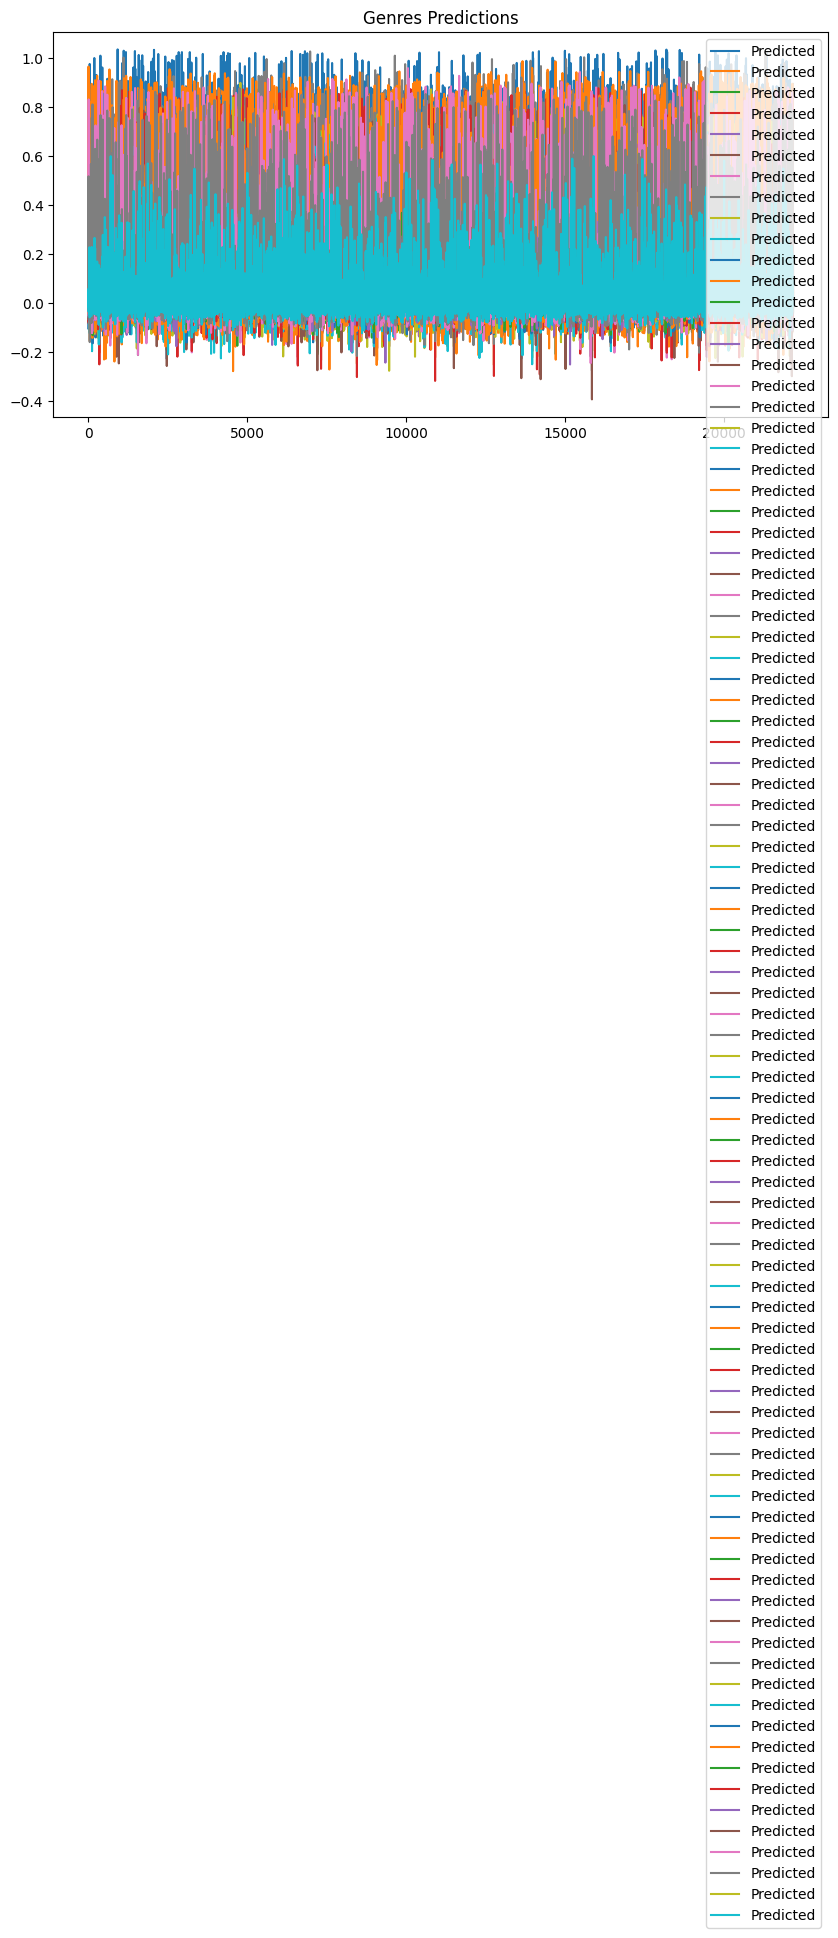

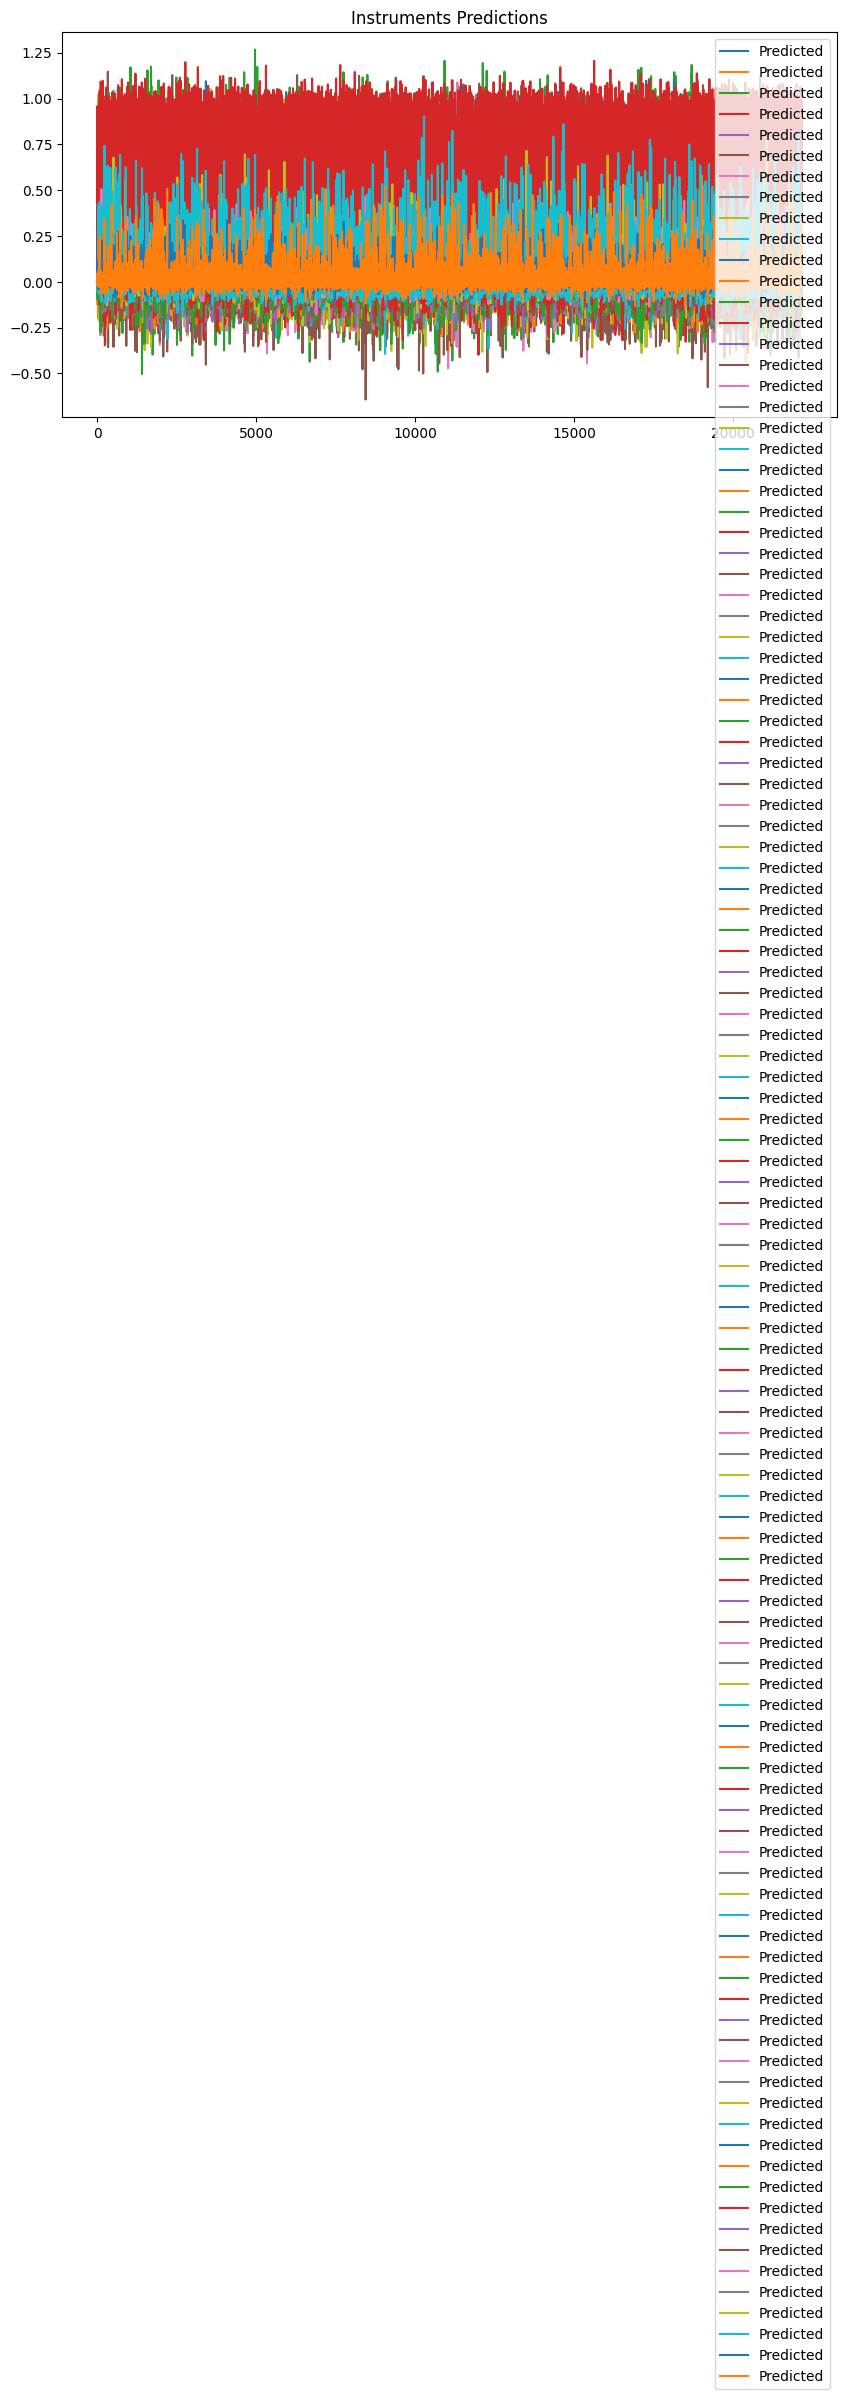

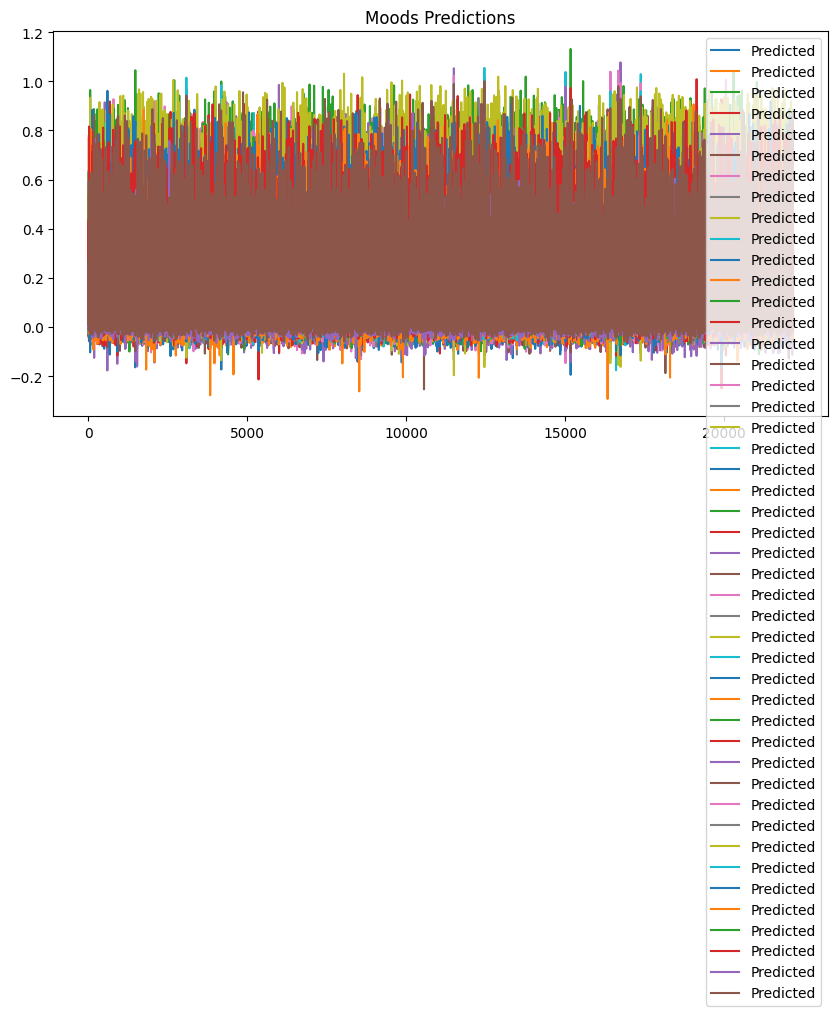

In [62]:
plot_predictions(y_genres_pred_df, "Genres Predictions")
plot_predictions(y_instruments_pred_df, "Instruments Predictions")
plot_predictions(y_moods_pred_df, "Moods Predictions")